In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 상대경로 / 절대경로
1. 절대경로
    * 절대적인 주소 
    * 환경에 상관없이 고정된 위치를 표현
    * ex) "G:\ubion\금융 빅데이터 4기", "http://www.google.com"
2. 상대경로
    * 상대적인 주소
    * 현재 작업중인 디렉토리에서 상위, 하위 이동
    * `./` : 현재 작업중인 디렉토리
    * `../` : 상위 디렉토리
    * `./폴더명/` : 하위폴더

In [2]:
#상위 폴더에 있는 csv폴더에서 sales records.csv파일을 로드
#pandas read_csv(경로, 인코딩 방식) 함수를 이용해서 csv파일 로드
#인코딩 기본 값은 UTF-8 (안써줘도 됨)
sales_df = pd.read_csv("../csv/Sales Records.csv", encoding = "UTF-8")
sales_df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06


In [3]:
## 결측치를 체크를 하는 함수 
## .isna() 함수를 사용하면 결측치 값은 True, 결측치가 아니면 False
## .isna().sum() 함수를 이용하면 결측치의 개수를 확인 가능(True = 1, False = 0)
sales_df.isna().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [4]:
## 데이터 프레임의 통계 요약 정보를 확인하는 함수
## describe() 함수를 사용하면 데이터의 개수, 
## 평균, 표준편차, 최소값, 최대값, 1사분위, 중앙값, 3사분위 값을 확인이 가능
## 데이터가 숫자형태인 데이터에만 적용
sales_df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04
mean,5.498719e+08,5002.855900,268.143139,188.806639,1.333355e+06,9.382658e+05,3.950893e+05
std,2.607835e+08,2873.246454,217.944092,176.445907,1.465026e+06,1.145914e+06,3.775550e+05
min,1.000892e+08,2.000000,9.330000,6.920000,1.679400e+02,1.245600e+02,4.338000e+01
25%,3.218067e+08,2530.750000,109.280000,56.670000,2.885511e+05,1.647855e+05,9.832914e+04
50%,5.485663e+08,4962.000000,205.700000,117.110000,8.000512e+05,4.816058e+05,2.890990e+05
75%,7.759981e+08,7472.000000,437.200000,364.690000,1.819143e+06,1.183822e+06,5.664227e+05
max,9.999342e+08,10000.000000,668.270000,524.960000,6.680027e+06,5.241726e+06,1.738178e+06


In [5]:
## 컬럼의 이름을 변경을 하는 방법
## 데이터프레임명.columns = [변경할 컬럼의 이름] ;데이터프레임 컬럼을 리스트의 형태로 출력
## 이 값을 변경을 시켜주면 컬럼의 이림이 변경
## 컬럼의 개수를 정확하게 입력해야함
#df.columns : 하면 컬럼값이 리스트 형태로 볼수 있음
sales_df.columns = ["권역", "국가", "상품종류", "판매채널", "우선순위", "주문일자", 
                    "주문ID", "발송일자", "판매단위", "단가", "원가", "총수익", "총비용", 
                    "총이윤"]
sales_df.head(1)

,권역,국가,상품종류,판매채널,우선순위,주문일자,주문ID,발송일자,판매단위,단가,원가,총수익,총비용,총이윤
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.0


In [6]:
## 컬럼의 데이터형태를 datetime 형태로 변경하는 함수. 
## pandas에 내장된 함수 : to_datetime()
## to_datetime(데이터프레임[컬럼명], format=데이터의 형태)
sales_df["주문일자"] = pd.to_datetime(sales_df["주문일자"], format="%m/%d/%Y")
sales_df.head(1)

,권역,국가,상품종류,판매채널,우선순위,주문일자,주문ID,발송일자,판매단위,단가,원가,총수익,총비용,총이윤
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,2011-01-27,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.0


In [7]:
## 데이터의 정렬 방식 변경을 하는 함수(기본값은 오름차순 정렬)
## sort_values([컬럼명])
# sales_df.sort_values("판매단위")    ## 오름차순 정렬
sales_df.sort_values("국가", ascending=False)  
## ascending 속성은 False 내림차순 True 오름차순(기본값)

,권역,국가,상품종류,판매채널,우선순위,주문일자,주문ID,발송일자,판매단위,단가,원가,총수익,총비용,총이윤
1030,Sub-Saharan Africa,Zimbabwe,Vegetables,Offline,M,2015-03-29,732472074,4/20/2015,3619,154.06,90.93,557543.14,329075.67,228467.47
613,Sub-Saharan Africa,Zimbabwe,Fruits,Offline,L,2016-10-12,300180232,12/1/2016,8856,9.33,6.92,82626.48,61283.52,21342.96
9645,Sub-Saharan Africa,Zimbabwe,Cereal,Online,H,2010-02-15,243301951,3/1/2010,7309,205.70,117.11,1503461.30,855956.99,647504.31
341,Sub-Saharan Africa,Zimbabwe,Vegetables,Online,L,2010-12-01,443544948,12/1/2010,3661,154.06,90.93,564013.66,332894.73,231118.93
1915,Sub-Saharan Africa,Zimbabwe,Cereal,Online,C,2012-08-21,222021949,9/12/2012,83,205.70,117.11,17073.10,9720.13,7352.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4678,Middle East and North Africa,Afghanistan,Household,Online,C,2015-05-31,586381375,6/10/2015,2134,668.27,502.54,1426088.18,1072420.36,353667.82
2018,Middle East and North Africa,Afghanistan,Office Supplies,Online,C,2014-03-19,288279378,4/19/2014,7129,651.21,524.96,4642476.09,3742439.84,900036.25
6106,Middle East and North Africa,Afghanistan,Clothes,Online,H,2013-04-14,713666570,5/29/2013,8652,109.28,35.84,945490.56,310087.68,635402.88
6324,Middle East and North Africa,Afghanistan,Personal Care,Offline,L,2012-08-02,541961419,9/14/2012,7282,81.73,56.67,595157.86,412670.94,182486.92


In [11]:
## 데이터정렬의 기준이 여러개 인 경우 --> sort_values([컬럼1, 컬럼2])
sales_df.sort_values(["국가", "판매단위"])

,권역,국가,상품종류,판매채널,우선순위,주문일자,주문ID,발송일자,판매단위,단가,원가,총수익,총비용,총이윤
400,Middle East and North Africa,Afghanistan,Household,Offline,M,2011-03-25,440761888,4/1/2011,92,668.27,502.54,61480.84,46233.68,15247.16
6342,Middle East and North Africa,Afghanistan,Personal Care,Online,L,2017-05-05,854282987,5/11/2017,175,81.73,56.67,14302.75,9917.25,4385.50
8062,Middle East and North Africa,Afghanistan,Household,Offline,L,2011-07-07,974112927,7/19/2011,517,668.27,502.54,345495.59,259813.18,85682.41
460,Middle East and North Africa,Afghanistan,Cosmetics,Offline,L,2011-10-21,873209512,11/19/2011,954,437.20,263.33,417088.80,251216.82,165871.98
2453,Middle East and North Africa,Afghanistan,Vegetables,Online,H,2015-10-26,636931788,12/10/2015,1125,154.06,90.93,173317.50,102296.25,71021.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,Sub-Saharan Africa,Zimbabwe,Meat,Online,H,2011-09-13,793859899,9/25/2011,9640,421.89,364.69,4067019.60,3515611.60,551408.00
8080,Sub-Saharan Africa,Zimbabwe,Fruits,Offline,C,2012-12-29,486245286,2/5/2013,9640,9.33,6.92,89941.20,66708.80,23232.40
4358,Sub-Saharan Africa,Zimbabwe,Fruits,Online,L,2011-07-12,368275296,7/26/2011,9699,9.33,6.92,90491.67,67117.08,23374.59
3459,Sub-Saharan Africa,Zimbabwe,Snacks,Online,M,2010-11-26,633683097,1/3/2011,9765,152.58,97.44,1489943.70,951501.60,538442.10


In [12]:
## 데이터프레임에서 인덱스나 컬럼을 삭제하는 함수
## drop(조건, axis=n) -> n은 축의 방향 : 0 = 행 / 1 = 열

## 특정 컬럼을 삭제
sales_df.drop(["주문일자"], axis=1)

,권역,국가,상품종류,판매채널,우선순위,주문ID,발송일자,판매단위,단가,원가,총수익,총비용,총이윤
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Asia,Laos,Beverages,Online,H,199342048,7/31/2014,8597,47.45,31.79,407927.65,273298.63,134629.02
9996,Europe,Liechtenstein,Cosmetics,Online,C,763044106,11/1/2012,562,437.20,263.33,245706.40,147991.46,97714.94
9997,Sub-Saharan Africa,Democratic Republic of the Congo,Vegetables,Offline,M,848579967,3/20/2013,2524,154.06,90.93,388847.44,229507.32,159340.12
9998,Sub-Saharan Africa,South Africa,Meat,Online,L,298185956,2/22/2017,8706,421.89,364.69,3672974.34,3174991.14,497983.20


In [13]:
## 특정 행(0)을 삭제 (열 삭제면 = 1)
sales_df.drop([1], axis=0)

,권역,국가,상품종류,판매채널,우선순위,주문일자,주문ID,발송일자,판매단위,단가,원가,총수익,총비용,총이윤
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,2011-01-27,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,2011-01-13,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,2012-09-11,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,2015-10-27,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06
5,Sub-Saharan Africa,South Africa,Beverages,Offline,H,2012-07-10,482292354,8/21/2012,9880,47.45,31.79,468806.00,314085.20,154720.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Asia,Laos,Beverages,Online,H,2014-07-15,199342048,7/31/2014,8597,47.45,31.79,407927.65,273298.63,134629.02
9996,Europe,Liechtenstein,Cosmetics,Online,C,2012-10-27,763044106,11/1/2012,562,437.20,263.33,245706.40,147991.46,97714.94
9997,Sub-Saharan Africa,Democratic Republic of the Congo,Vegetables,Offline,M,2013-02-14,848579967,3/20/2013,2524,154.06,90.93,388847.44,229507.32,159340.12
9998,Sub-Saharan Africa,South Africa,Meat,Online,L,2017-02-19,298185956,2/22/2017,8706,421.89,364.69,3672974.34,3174991.14,497983.20


In [14]:
## 원본의 데이터를 지금까지 유지하고 출력.
## 원본 데이터를 수정하는 속성이 존재. 
## inplace = True : 기존이 되는 원본 데이터를 수정하겠다. 
##           False가 기본값
sales_df.drop(["발송일자"], axis = 1, inplace=True)
## 출력값이 나오지 않는 이유는?
## sales_df = sales_df.drop(["발송일자"], axis=1) 동일한 작업임으로 
## 변수에 데이터가 할당되었기 때문에 출력값은 나오지 않는다. 

In [17]:
## 인덱스의 초기화 하는 함수 
## reset_index(drop = n) -> n이 True면 기존의 인덱스가 삭제, 
## False면 기존의 인덱스는 새로운 컬럼으로 추가
## inplace 속성도 가지고 있다. 
sales_df.reset_index(drop=False)  #sales_df.reset_index()
## 기존의 인덱스를 새로운 컬럼에 유지 (기본값); 기존의 인덱스를 컬럼으로 만들어 준다. 
#sales_df.reset_index(drop=True) ## 기존의 인덱스를 삭제

,index,권역,국가,상품종류,판매채널,우선순위,주문일자,주문ID,판매단위,단가,원가,총수익,총비용,총이윤
0,0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,2011-01-27,292494523,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,1,Europe,Latvia,Beverages,Online,C,2015-12-28,361825549,1075,47.45,31.79,51008.75,34174.25,16834.50
2,2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,2011-01-13,141515767,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,2012-09-11,500364005,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,4,Europe,Czech Republic,Beverages,Online,C,2015-10-27,127481591,3491,47.45,31.79,165647.95,110978.89,54669.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,Asia,Laos,Beverages,Online,H,2014-07-15,199342048,8597,47.45,31.79,407927.65,273298.63,134629.02
9996,9996,Europe,Liechtenstein,Cosmetics,Online,C,2012-10-27,763044106,562,437.20,263.33,245706.40,147991.46,97714.94
9997,9997,Sub-Saharan Africa,Democratic Republic of the Congo,Vegetables,Offline,M,2013-02-14,848579967,2524,154.06,90.93,388847.44,229507.32,159340.12
9998,9998,Sub-Saharan Africa,South Africa,Meat,Online,L,2017-02-19,298185956,8706,421.89,364.69,3672974.34,3174991.14,497983.20


In [18]:
sales_df.reset_index(drop=True) ## 기존의 인덱스를 삭제
#sales_df.reset_index(drop=True, inplace=True) ## 실제 데이터 수정

,권역,국가,상품종류,판매채널,우선순위,주문일자,주문ID,판매단위,단가,원가,총수익,총비용,총이윤
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,2011-01-27,292494523,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,2015-12-28,361825549,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,2011-01-13,141515767,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,2012-09-11,500364005,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,2015-10-27,127481591,3491,47.45,31.79,165647.95,110978.89,54669.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Asia,Laos,Beverages,Online,H,2014-07-15,199342048,8597,47.45,31.79,407927.65,273298.63,134629.02
9996,Europe,Liechtenstein,Cosmetics,Online,C,2012-10-27,763044106,562,437.20,263.33,245706.40,147991.46,97714.94
9997,Sub-Saharan Africa,Democratic Republic of the Congo,Vegetables,Offline,M,2013-02-14,848579967,2524,154.06,90.93,388847.44,229507.32,159340.12
9998,Sub-Saharan Africa,South Africa,Meat,Online,L,2017-02-19,298185956,8706,421.89,364.69,3672974.34,3174991.14,497983.20


In [19]:
sales_df
## df를 출력하면 인덱스가 변경이 되지 않는 상태
## df의 값을 변경한다는 코드가 존재 x
## 쥬피터 환경에서는 출력이 나온다는 의미는 그냥 확인 작업
## 실제 데이터가 변경이 되는 경우에는 출력 x

,권역,국가,상품종류,판매채널,우선순위,주문일자,주문ID,판매단위,단가,원가,총수익,총비용,총이윤
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,2011-01-27,292494523,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,2015-12-28,361825549,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,2011-01-13,141515767,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,2012-09-11,500364005,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,2015-10-27,127481591,3491,47.45,31.79,165647.95,110978.89,54669.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Asia,Laos,Beverages,Online,H,2014-07-15,199342048,8597,47.45,31.79,407927.65,273298.63,134629.02
9996,Europe,Liechtenstein,Cosmetics,Online,C,2012-10-27,763044106,562,437.20,263.33,245706.40,147991.46,97714.94
9997,Sub-Saharan Africa,Democratic Republic of the Congo,Vegetables,Offline,M,2013-02-14,848579967,2524,154.06,90.93,388847.44,229507.32,159340.12
9998,Sub-Saharan Africa,South Africa,Meat,Online,L,2017-02-19,298185956,8706,421.89,364.69,3672974.34,3174991.14,497983.20


In [20]:
## 파생변수를 생성하는 방법 
## 데이터프레임명[파생변수명] = 연산식 
## 총이윤 컬럼을 삭제하고 다시 연산하여 컬럼을 추가
sales_df.drop("총이윤", axis=1, inplace=True)   ##총이윤 컬럼을 삭제하고 원본 데이터에 할당
sales_df["총 이윤"] = sales_df["총수익"] - sales_df["총비용"]
sales_df.head(2)
## 주의 데이프레임명 = 계산한 데이터 값 -> 데이터프레임 -> 시리즈 변경s

,권역,국가,상품종류,판매채널,우선순위,주문일자,주문ID,판매단위,단가,원가,총수익,총비용,총 이윤
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,2011-01-27,292494523,4484,651.21,524.96,2920025.64,2353920.64,566105.0
1,Europe,Latvia,Beverages,Online,C,2015-12-28,361825549,1075,47.45,31.79,51008.75,34174.25,16834.5


## corona.csv 파일 로드 
1. `createDt`컬럼을 기준으로 오름차순
2. `Unnamed: 0`컬럼을 삭제
3. 인덱스의 값을 리셋

In [21]:
corona_df = pd.read_csv("../csv/corona.csv")
#createDt 기준으로 오름차순 정렬
corona_df.sort_values("createDt", inplace= True)
corona_df.drop("Unnamed: 0", axis=1, inplace=True)
corona_df.reset_index(drop=True, inplace=True)
corona_df.head()

,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000


In [ ]:
## 결측치 확인 
corona_df.isna().sum()

#### 같은 컬럼의 값의 차이를 넣어주는 방법 2가지 
###인덱스를 이동 하는 함수
> shift(n)
- 인덱스를 n 만큼 이동
- n=1 기본값 : 바로 위의 인덱스의 값을 가지고 온다.
- 바로 아래의 값을 가지고 오는 방법? n= -1
###값의 차이를 출력하는 함수
> diff(period = n, axis = n)
- 바로 전의 인덱스의 값과의 차이를 출력
- periods 기본값이 1 shift 와 마찬가지로 행, 열의 수를 지정
- axis 기본값은 0, 1이면 컬럼을 이동
- diff() : 한 객체내에서 열과 열 / 행과 행의 차이를 출력


In [22]:
## 새로운 파생변수 생성 "일일확진자"
## `decideCnt`의 차이만큼을 일일확진자 컬럼에 추가.
## 일일 확진자 -> decideCnt 컬럼의 차이를 구해서 그 값을 컬럼 추가 
corona_df["일일확진자"] = (corona_df["decideCnt"] - corona_df["decideCnt"].shift()).fillna(0)
## 첫행의 값은 NaN 결측치로 출력이 된다. 
## 이유는 전의 행의 값이 존재하지 않아서 연산이 불가능하기 때문
## 연산 후 결측치의 값을 채워주는 함수.
## fillna(값) : 결측치의 값에 채워주는 부분
corona_df.head(2)

,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate,일일확진자
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0


In [23]:
## 일일사망자 파생변수 생성
## deathCnt 값의 차이를 삽입
## NaN 값은 0으로 대체하여 파생변수 삽입
corona_df["일일사망자"] = corona_df["deathCnt"].diff().fillna(0)
corona_df.head(2)

,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate,일일확진자,일일사망자
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,0.0
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0


In [ ]:
##fillna() 
# ()안의 숫자형태나 문자형태의 데이터를 넣으면 결측치인 부분이 삽입
# method = ('ffill', 'bfill')
# ffill : 전의 행의 값이 존재하면 그 값으로 결측치를 채워준다. 
# bfill : 후의 행의 값이 존재하면 그 값으로 결측치를 채워준다. 
corona_df.tail(10)

In [ ]:
corona_df.head(10)

In [27]:
##corona 데이터는 누적의심자, 누적확진률 컬럼의 결측치가 존재.
## tail 확인했을때 마지막이 값이 존재하지 않는다. 
## ffill을 사용해서 전의 행의 값을 가지고와서 결측치를 채워보는 예제

#accExamCnt 컬럼에는 결측치 존재
corona_df["accExamCnt"].isna().sum()
#"accExamCnt"의 값이 결측치인 부분만 출력 
# - loc[인덱스의 조건, 컬럼의 조건]
# - 조건을 입력하지 않으면 전체를 출력
# - corono.loc[결측치인 부분 조건, ]


# - 결측치인 부분 조건 : corona_df["accExamCnt"].isna()
corona_df.loc[corona_df["accExamCnt"].isna(),]
# - 결측치가 아닌 부분 조건 : ~ 사용
corona_df.loc[~corona_df["accExamCnt"].isna(),]


# ~연산자 : 부정
# True -> False, False -> True



#해당 컬럼의 결측치의 개수를 확인
#fillna() 함수를 이용하여 데이터를 삽입
#ffill이라는 속성을 사용하여 값을 삽입
corona_df["accExamCnt"].fillna(method="ffill").tail(10)

810    21518073.0
811    21518073.0
812    21518073.0
813    21518073.0
814    21518073.0
815    21518073.0
816    21518073.0
817    21518073.0
818    21518073.0
819    21518073.0
Name: accExamCnt, dtype: float64

In [28]:
#isin() --> ()안에 들어간 값들이 존재하면 True 아니면 False
import numpy as np

In [31]:
#isin([특정값, 특정값2]) 리스트안에 있는 값들이 포함되어 있으면 True 아니면 False
corona_df["accExamCnt"].isin([np.nan, np.inf, -np.inf])
corona_df.loc[corona_df["accExamCnt"].isin([np.nan, np.inf, -np.inf]),]

,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate,일일확진자,일일사망자
692,2022-02-01 09:06:24.411,6772,864026,776,20220201,00:00,2022-02-09 13:04:21.424,NaN,NaN,18338.0,17.0
693,2022-02-02 09:04:49.92,6787,884294,777,20220202,00:00,2022-02-09 13:04:29.013,NaN,NaN,20268.0,15.0
694,2022-02-03 08:46:14.856,6812,907200,778,20220203,00:00,2022-02-09 13:04:42.741,NaN,NaN,22906.0,25.0
695,2022-02-04 08:58:40.476,6836,934638,779,20220204,00:00,2022-02-09 13:04:52.382,NaN,NaN,27438.0,24.0
696,2022-02-05 10:25:08.782,6858,970983,780,20220205,00:00,2022-02-09 13:05:01.221,NaN,NaN,36345.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...
815,2022-06-04 08:56:49.219,24238,18153814,900,20220604,00:00,2022-06-08 09:11:26.303,NaN,NaN,12039.0,9.0
816,2022-06-05 08:53:19.426,24258,18163648,901,20220605,00:00,2022-06-08 09:11:04.758,NaN,NaN,9834.0,20.0
817,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN,5022.0,21.0
818,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN,6172.0,20.0


In [32]:
#ffill 을 전의 데이터를 가지고와서 값을 삽입
#bfill 은 데이터가 삽입이 되지 않는다. 이유는 후의 데이터중 결측치가 아닌 값이 존재 하지 않으니까
#결국 결측치가 당겨지는 것임
corona_df["accExamCnt"].fillna(method='bfill')

0      210144.0
1      222395.0
2      234998.0
3      248647.0
4      261335.0
         ...   
815         NaN
816         NaN
817         NaN
818         NaN
819         NaN
Name: accExamCnt, Length: 820, dtype: float64

# apply 함수
 컬럼에 있는 각 원소들에 연산을 해주는 함수.
 데이터 프레임에 각 항목들의 데이터를 변환 시켜주는 함수.
 표의 형태의 각 셀의 값.-> apply(연산) --> 연산안에 각 셀의 값을 넣어서 변환

# lambda 함수
 함수를 선언과 동시에 호출 하는 기능
 표현식을 한줄로 처리하기위해 사용하는 함수


In [34]:

## 외부 함수를 이용하여 apply() 사용할 때
## 데이터프레임[컬럼].apply(외부함수명) : 인자값을 넣지 않는다. 
## apply, lambda 함수를 같이 사용하는 경우
## 데이터프레임[컬럼].apply(lambda x : 표현식)



## 누적확진률을 기준으로 1.55보다 높으면 `High` 낮으면 `Low` 값을 가지는 파생변수 `H/L`

## 외부 함수를 이용하여 apply()
def H_and_L(x):
    if x > 1.55:
        return "High"
    else:
        return "Low"
corona_df["H/L"] = corona_df["accDefRate"].apply(H_and_L)

## apply lambda 함수를 같이 사용하는 경우
corona_df["H/L"] = corona_df["accDefRate"].apply(lambda x : "High" if (x > 1.55) else "Low")
corona_df.head()

,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate,일일확진자,일일사망자,H/L
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,0.0,High
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0,High
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0,High
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0,High
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0,High


In [35]:
## 컬럼의 값들이 빈도수를 체크하는 함수
## value_counts()
corona_df["H/L"].value_counts()

Low     617
High    203
Name: H/L, dtype: int64

### 데이터의 결합
>concat()
- axis속성 0, 1 행을 결합, 열을 결합 지정 (기본값은 행을 추가)
- 단순하게 데이터를 결합

>merge()
- 특정한 조건을 기준으로 하여 데이터를 결합
- on속성에서 합쳐질 데이터프레임의 조건을 넣어주는 부분
- 조건에 맞는 컬럼의 값을 넣어준다
- how속성 left : 왼쪽에 있는 데이터 프레임을 기준, 
        right : 오른쪽에 있는 데이터 프레임을 기준, 
        inner : 두 데이터 프레임의 교집합
        outter : 두 데이터 프레임의 합집합


## csv 파일을 4개를 로드 
1. transaction_1, transaction_2 데이터프레임을 결합(단순 행 추가 결합)
2. transaction_detail_1, transaction_detail_2, 데이터프레임을 결합(행 추가 결합)
3. 1,2번 과정에서 결합된 데이터프레임을 조인 결합

In [36]:
transaction_1 = pd.read_csv("../csv/transaction_1.csv")
transaction_2 = pd.read_csv("../csv/transaction_2.csv")
transaction_detail_1 = pd.read_csv("../csv/transaction_detail_1.csv")
transaction_detail_2 = pd.read_csv("../csv/transaction_detail_2.csv")

In [40]:
## 단순 행 추가하는 결합 사용하는 함수
## concat()
## axis=n : n이 0이면 행 1이면 열 추가 (기본값은 행을 추가)
## 단순하게 행이나 열을 합치는 기능
## 단순하게 결합 index도 그대로 유지. ignore_index 속성을 이용해서 인덱스의 값을 초기화
tran = pd.concat([transaction_1, transaction_2], ignore_index=True)
tran.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [42]:
tran_d = pd.concat([transaction_detail_1, transaction_detail_2], ignore_index=True)
tran_d

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2
...,...,...,...,...
7139,7139,T0000006894,S004,1
7140,7140,T0000006895,S002,1
7141,7141,T0000006896,S001,2
7142,7142,T0000006897,S002,1


In [ ]:
## 조인 결합을 이용해서 두 데이터프레임을 합치는 함수
## merge()
## 특정한 조건을 기준으로 열을 추가해주는 함수
## on 속성은 합쳐질 데이터프레임에 조건을 넣어주는 부분. 
## 컬럼의 값들이 같은 경우 열을 추가해준다. 
## on 속성에는 컬럼명을 적어주는 부분
## how 속성은 기준이 되는 데이터프레임을 지정
## left, right, inner, outer 값들은 지정할 수 있다. 
## transaction과 transaction_detail 조인결합 기준은 left 조건은 transaction_id값이 같은 경우

In [43]:
total_tran = pd.merge(tran,tran_d, on="transaction_id", how = 'left')
total_tran.head(5)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2


In [44]:
total_tran1 = pd.merge(tran,tran_d, on="transaction_id", how = 'right')
total_tran1.head(5)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2


In [45]:
total_tran = pd.merge(tran,tran_d, on="transaction_id", how = 'inner')
total_tran.head(5)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2


In [47]:
total_tran = pd.merge(tran,tran_d, on="transaction_id", how = 'outer')
total_tran.head(5)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2


In [48]:
##1. 1.00e+10 지수 표현식 없애기
pd.options.display.float_format = '{:.5f}'.format
##되돌리기
pd.reset_option('display.float_format')

1. item_master 파일을 로드해서 join_data 조인결합 (left 기준은 join_data)

In [49]:
item_master = pd.read_csv("../csv/item_master.csv")
item_master.head(1)

,item_id,item_name,item_price
0,S001,PC-A,50000


In [50]:
total_data = pd.merge(total_tran, item_master, on='item_id', how='left')
total_data.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,item_name,item_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,PC-E,210000


In [51]:
## datetime 형 데이터에서 부분만 추출하는 방법
## payment_date 컬럼의 데이터 형태를 datetime 변경
## 파생변수 payment_month 생성 년과 월만 추출한 데이터를 삽입
## to_datetime()을 사용할 값이 datetime형태의 문자열이라면 format을 생략할 수 있다. 
total_data["payment_date"] = pd.to_datetime(total_data["payment_date"])

In [52]:
## 파생변수 생성
## .dt.strftime() 함수는 datetime형태에서만 사용이 가능
total_data["payment_month"] = total_data["payment_date"].dt.strftime("%Y%m")

In [53]:
total_data.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,item_name,item_price,payment_month
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,PC-E,210000,201902


In [54]:
## payment_month을 기준으로 그룹화
## 월별 가격의 합계를 구하는 데이터프레임 출력
## 그룹화 하는 함수 
## groupby()
## 특정 컬럼을 지정해서 데이터들이 같은 값들을 그룹화
## 그룹화된 데이터들의 평균이나 합계 최대, 최소 값, 표준편차와 같은 통계량을 생성할 수 있다. 
total_data.groupby("payment_month").sum()["price"]
total_data.groupby("payment_month").sum()[["price"]] #시리즈 형태가 데이터 프레임 형태로 된다 대괄호 두개


payment_month
201902    179190000
201903    175375000
201904    176720000
201905    171385000
201906    183395000
201907    188685000
Name: price, dtype: int64

In [55]:
## 다중 그룹화
## (다중그룹화할때는 리스트 형태로 컬럼값)
total_data.groupby(["payment_month", "item_name"]).sum()["price"]

payment_month  item_name
201902         PC-A         29270000
               PC-B         27785000
               PC-C         22905000
               PC-D         35010000
               PC-E         64220000
201903         PC-A         30440000
               PC-B         28540000
               PC-C         20275000
               PC-D         27205000
               PC-E         68915000
201904         PC-A         31600000
               PC-B         26850000
               PC-C         23665000
               PC-D         26045000
               PC-E         68560000
201905         PC-A         29575000
               PC-B         28660000
               PC-C         21885000
               PC-D         27485000
               PC-E         63780000
201906         PC-A         30650000
               PC-B         28020000
               PC-C         24865000
               PC-D         32550000
               PC-E         67310000
201907         PC-A         30225000
             

In [56]:
## 그룹화한 데이터에서 합계 만이 아니라 평균, 최소, 최대 값을 같이 출력하는 방법
## sum 합계, mean 평균, min 최소값, max 최대값
## 4개를 동시에 다 보여주려면?
## groupby().agg(['mean', 'sum', 'min', 'max])
total_data.groupby("payment_month").agg(['mean', 'sum', 'min', 'max'])["price"]

/var/folders/h1/6sllxx6j0zb6l_hvj_9ys3qh0000gn/T/ipykernel_63264/2860494180.py:5: FutureWarning: ['transaction_id', 'payment_date', 'customer_id', 'item_id', 'item_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  total_data.groupby("payment_month").agg(['mean', 'sum', 'min', 'max'])["price"]


,mean,sum,min,max
payment_month,,,,
201902,153943.298969,179190000,50000,750000
201903,148497.036410,175375000,50000,420000
201904,149256.756757,176720000,50000,460000
201905,146482.905983,171385000,50000,675000
201906,152574.875208,183395000,50000,570000
201907,151798.069187,188685000,50000,560000


## drinks.csv 파일 로드
1. 결측치 확인
2. continent 컬럼에 결측치가 존재 결측치의 값을 'OT'로 지정
3. continent별 wine_servings 컬럼의 평균, 최소, 최대, 합계를 출력
4. total_litres_of_pure_alchol 컬럼의 전체 평균보다 continent별 평균이 높은 continent가 어디인지 출력

In [57]:
drinks = pd.read_csv("../csv/drinks.csv")

In [58]:
## 결측치 확인
drinks.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [59]:
## 결측치의 값을 'OT' 지정
drinks["continent"] = drinks["continent"].fillna('OT')

In [60]:
## continent별 wine_servings컬럼의 평균, 합계, 최소, 최대 출력
drinks.groupby('continent').agg(['mean', 'sum', 'min', 'max'])["wine_servings"]

/var/folders/h1/6sllxx6j0zb6l_hvj_9ys3qh0000gn/T/ipykernel_63264/3496730294.py:2: FutureWarning: ['country'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  drinks.groupby('continent').agg(['mean', 'sum', 'min', 'max'])["wine_servings"]


,mean,sum,min,max
continent,,,,
AF,16.264151,862,0,233
AS,9.068182,399,0,123
EU,142.222222,6400,0,370
OC,35.625000,570,0,212
OT,24.521739,564,1,100
SA,62.416667,749,1,221


In [61]:
## 전체 술 소비량의 평균
total_mean = drinks["total_litres_of_pure_alcohol"].mean()

In [62]:
# 대륙별 정체 술 소비량의 평균 출력
continent_mean = drinks.groupby('continent').mean()['total_litres_of_pure_alcohol']

In [63]:
continent_mean[continent_mean >= total_mean]

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

## uriage 데이터 로드 
1. item_name 데이터가 대/소문자 문제, 공백 문제 -> 그룹화 X -> 규칙성이 있게 데이터 변환
2. 결측치가 존재 -> 결측치의 값을 채워준다. 
3. 상품별로 그룹화 확인

In [65]:
## 데이터의 값에 공백이 존재하는 경우 발생하는 에러 
a = {
    'name' : ['a', ' a', 'b', ' b'],
    'age' : [10, 20, 15, 25]
}
df = pd.DataFrame(a)
df

,name,age
0,a,10
1,a,20
2,b,15
3,b,25


In [66]:
df.groupby('name').sum()

,age
name,
a,20
b,25
a,10
b,15


In [67]:
## 데이터 로드
uriage_df = pd.read_csv("../csv/uriage.csv")
uriage_df.head(3)

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02,상품A,100.0,김가온
1,2019-07-13 13:05,상 품 S,NaN,김우찬
2,2019-05-11 19:42,상 품 a,NaN,김유찬


In [68]:
## item_name이라는 컬럼의 값이 공백 존재, 대소문자 구분 x
## 공백이 존재하는데 공백을 제거
## strip() : 컨텐츠의 양쪽 공백을 삭제 , rstrip()/lstrip()
## strip()에서는 글자 간 사이의 공백 삭제 x
## 공백이라는 부분을 아무것도 없는 형태로 대체 (" "-> "")
## 이런 상황에서는 어떤 함수를 사용하는가? 뭔가 대체를 한다?
## replace()
## replace(변경이될문자열, 변경할문자열)
## item_name 공백을 전부 삭제

#case1
uriage_df["item_name"] = uriage_df["item_name"].str.replace(" ","")
#case2
uriage_df["item_name"] = uriage_df["item_name"].apply(lambda x : x.replace(" ", ""))

## strip() -> 문자열 양 옆의 공백을 삭제
## replace(" ", "") -> 공백을 삭제(문자열 사이의 공백도 포함)

In [71]:
## item_name 데이터를 대문자 변환
#case1
uriage_df["item_name"] = uriage_df["item_name"].str.upper()
#case2
uriage_df["item_name"] = uriage_df["item_name"].apply(lambda x : x.upper())

In [77]:
#공백제거, 소문자로 변경을 하는 두번의 작업을
#apply() 함수를 이용하여 한번에 처리
test = "a b c d e f"
test.replace(" ","")
test.upper()

'A B C D E F'

In [78]:
def change(x):
    # x값 -> 컬럼에 있는 데이터 1개씩
    # item_name에 있는 데이터 형태 -> string
    result = x.replace(" ", "")
    result = result.lower()
    return result

uriage_df["item_name"].apply(change)

0       상품a
1       상품s
2       상품a
3       상품z
4       상품a
       ... 
2994    상품y
2995    상품m
2996    상품q
2997    상품h
2998    상품d
Name: item_name, Length: 2999, dtype: object

In [80]:
uriage_df["item_name"].apply(lambda x: x.replace(" ","").lower())

0       상품a
1       상품s
2       상품a
3       상품z
4       상품a
       ... 
2994    상품y
2995    상품m
2996    상품q
2997    상품h
2998    상품d
Name: item_name, Length: 2999, dtype: object

In [74]:
uriage_df.isna().sum()

purchase_date      0
item_name          0
item_price       387
customer_name      0
dtype: int64

In [ ]:
## item_price 결측치에 item_name으로 그룹화 item_price의 평균 값을 삽입
flg_is_null = uriage_df["item_price"].isna()

## item_price의 값이 결측치인 경우 item_name의 유니크 값(중복 데이터 삭제)
na_list = list(uriage_df.loc[flg_is_null, "item_name"].unique())
na_list

In [ ]:
~flg_is_null

In [ ]:
## `~` 연산자 -> bool의 형태를 반전
for i in na_list:
    ## (~flg_is_null)&(uriage_df["item_name"] == i) : 결측치가 아니고 item_name의 값이 na_list 값 중 하나
    price = uriage_df.loc[(~flg_is_null)&(uriage_df["item_name"] == i),     
                            "item_price"].mean()        ## item_price 컬럼을 선택해서 그 값의 평균
    ## price 값은 na_list중 하나의 값의 평균 값

    ## (flg_is_null)&(uriage_df["item_name"] == i) : 결측치고, item_name의 값이 na_list 값 중 하나
    uriage_df.loc[(flg_is_null)&(uriage_df["item_name"] == i), 
                    "item_price"] = price       ## item_price에 price라는 변수를 삽입


In [ ]:
uriage_df.isna().sum()

In [ ]:
uriage_df.loc[uriage_df["item_name"]== "상품A"]

In [81]:
import matplotlib.pyplot as plt

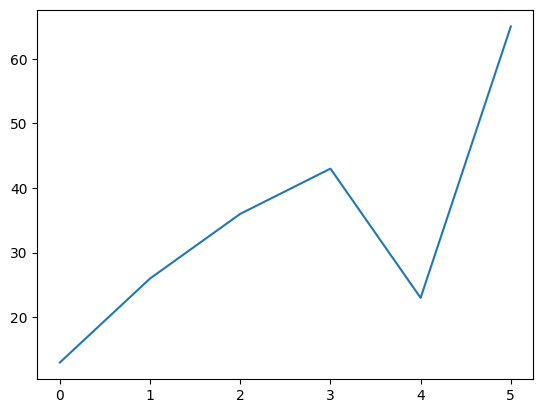

In [83]:
y = [13,26,36,43,23,65]
plt.plot(range(len(y)),y)
plt.show()


In [85]:
import numpy as np

In [93]:
x = np.linspace(-3,3,101)
x

array([-3.  , -2.94, -2.88, -2.82, -2.76, -2.7 , -2.64, -2.58, -2.52,
       -2.46, -2.4 , -2.34, -2.28, -2.22, -2.16, -2.1 , -2.04, -1.98,
       -1.92, -1.86, -1.8 , -1.74, -1.68, -1.62, -1.56, -1.5 , -1.44,
       -1.38, -1.32, -1.26, -1.2 , -1.14, -1.08, -1.02, -0.96, -0.9 ,
       -0.84, -0.78, -0.72, -0.66, -0.6 , -0.54, -0.48, -0.42, -0.36,
       -0.3 , -0.24, -0.18, -0.12, -0.06,  0.  ,  0.06,  0.12,  0.18,
        0.24,  0.3 ,  0.36,  0.42,  0.48,  0.54,  0.6 ,  0.66,  0.72,
        0.78,  0.84,  0.9 ,  0.96,  1.02,  1.08,  1.14,  1.2 ,  1.26,
        1.32,  1.38,  1.44,  1.5 ,  1.56,  1.62,  1.68,  1.74,  1.8 ,
        1.86,  1.92,  1.98,  2.04,  2.1 ,  2.16,  2.22,  2.28,  2.34,
        2.4 ,  2.46,  2.52,  2.58,  2.64,  2.7 ,  2.76,  2.82,  2.88,
        2.94,  3.  ])

In [94]:
y = (1/np.sqrt(2* np.pi)) * np.exp(-x**2/2)
y

array([0.00443185, 0.00529634, 0.00630673, 0.00748287, 0.00884645,
       0.01042093, 0.01223153, 0.01430511, 0.0166701 , 0.01935628,
       0.02239453, 0.02581658, 0.02965458, 0.03394076, 0.03870686,
       0.0439836 , 0.04980009, 0.05618314, 0.06315656, 0.07074039,
       0.07895016, 0.08779607, 0.09728227, 0.10740608, 0.1181573 ,
       0.1295176 , 0.14145997, 0.15394829, 0.16693704, 0.18037116,
       0.19418605, 0.20830779, 0.2226535 , 0.23713195, 0.25164434,
       0.26608525, 0.28034381, 0.29430503, 0.30785126, 0.3208638 ,
       0.3332246 , 0.344818  , 0.35553253, 0.36526267, 0.37391061,
       0.38138782, 0.38761662, 0.39253148, 0.39608021, 0.39822483,
       0.39894228, 0.39822483, 0.39608021, 0.39253148, 0.38761662,
       0.38138782, 0.37391061, 0.36526267, 0.35553253, 0.344818  ,
       0.3332246 , 0.3208638 , 0.30785126, 0.29430503, 0.28034381,
       0.26608525, 0.25164434, 0.23713195, 0.2226535 , 0.20830779,
       0.19418605, 0.18037116, 0.16693704, 0.15394829, 0.14145

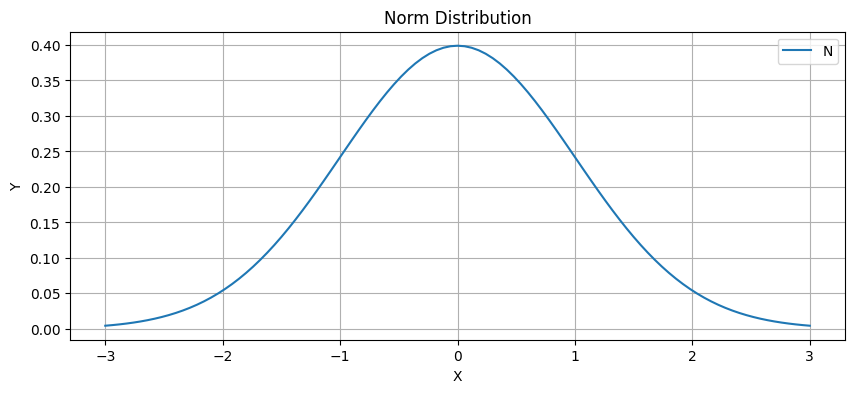

In [102]:
plt.figure(figsize=(10,4))
plt.plot(x,y)
plt.xlabel("X") #X축 라벨
plt.ylabel("Y") #Y축 라벨
plt.grid() #격자표시
plt.title("Norm Distribution") #그래프의 제목
plt.legend("N(O,1)") #그래프의 범례 추가
plt.show()


In [103]:
pip install scipy

     |████████████████████████████████| 36.6 MB 44.9 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [104]:
import scipy.stats as stats

In [107]:
x = np.linspace(-3,3,101)
y = stats.norm(0,1).pdf(x)
y

array([0.00443185, 0.00529634, 0.00630673, 0.00748287, 0.00884645,
       0.01042093, 0.01223153, 0.01430511, 0.0166701 , 0.01935628,
       0.02239453, 0.02581658, 0.02965458, 0.03394076, 0.03870686,
       0.0439836 , 0.04980009, 0.05618314, 0.06315656, 0.07074039,
       0.07895016, 0.08779607, 0.09728227, 0.10740608, 0.1181573 ,
       0.1295176 , 0.14145997, 0.15394829, 0.16693704, 0.18037116,
       0.19418605, 0.20830779, 0.2226535 , 0.23713195, 0.25164434,
       0.26608525, 0.28034381, 0.29430503, 0.30785126, 0.3208638 ,
       0.3332246 , 0.344818  , 0.35553253, 0.36526267, 0.37391061,
       0.38138782, 0.38761662, 0.39253148, 0.39608021, 0.39822483,
       0.39894228, 0.39822483, 0.39608021, 0.39253148, 0.38761662,
       0.38138782, 0.37391061, 0.36526267, 0.35553253, 0.344818  ,
       0.3332246 , 0.3208638 , 0.30785126, 0.29430503, 0.28034381,
       0.26608525, 0.25164434, 0.23713195, 0.2226535 , 0.20830779,
       0.19418605, 0.18037116, 0.16693704, 0.15394829, 0.14145

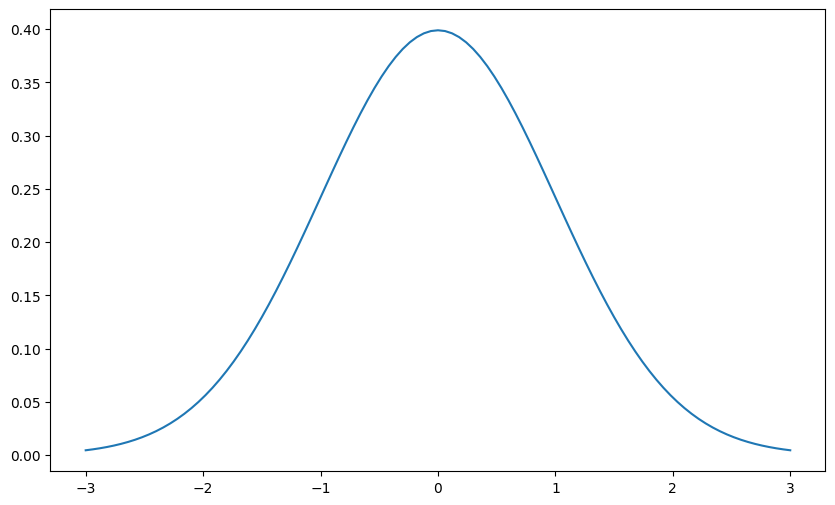

In [108]:
plt.figure(figsize=(10,6))
plt.plot(x,y)
plt.show()

## 예제 
1. csv폴더 안에 있는 num_3 폴더에서 csv들을 로드
2. uselog데이터를 제외한 3개의 데이터프레임을 조인 결합
3. 2019년 01월 01일 이후의 데이터를 출력

In [109]:
campaign = pd.read_csv("../csv/num_3/campaign_master.csv")
class_master = pd.read_csv("../csv/num_3/class_master.csv")
customer = pd.read_csv("../csv/num_3/customer_master.csv")
use = pd.read_csv("../csv/num_3/use_log.csv")

In [111]:
campaign.head(1)

,campaign_id,campaign_name
0,CA1,2_일반


In [112]:
class_master.head(1)

,class,class_name,price
0,C01,0_종일,10500


In [113]:
customer.head(1)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0


In [114]:
use.head(1)

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01


In [115]:
customer_join = pd.merge(customer,class_master, on = "class", how = "left")
customer_join = pd.merge(customer_join,campaign, on = 'campaign_id', how = "left")

In [116]:
customer_join.head(2)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반


In [118]:
customer_join["start_date"] = pd.to_datetime(customer_join["start_date"])

In [119]:
customer_join[customer_join["start_date"]>= pd.to_datetime("2019-01-01")]

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
3963,AS918754,XXXX,C03,F,2019-01-01,NaN,CA1,0,2_야간,6000,2_일반
3964,OA106766,XXXXX,C01,F,2019-01-01,NaN,CA1,0,0_종일,10500,2_일반
3965,IK283032,XXXX,C01,M,2019-01-01,NaN,CA1,0,0_종일,10500,2_일반
3966,AS333662,XXXXX,C01,F,2019-01-02,NaN,CA1,0,0_종일,10500,2_일반
3967,TS572467,XX,C03,F,2019-01-02,NaN,CA1,0,2_야간,6000,2_일반
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반
4188,HD246549,XXXXX,C01,F,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반
4189,GD037007,XXXXX,C03,M,2019-03-14,NaN,CA1,0,2_야간,6000,2_일반
4190,OA953150,XXXXX,C01,M,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반
